# Görev-1

* **Soru 1:** persona.csv dosyasını okutunuz ve veri seti ile ilgili genel bilgileri gösteriniz.

In [73]:
import pandas as pd

In [74]:
df = pd.read_csv("persona.csv")
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


* **Soru 2:** Kaç unique SOURCE vardır? Frekansları nedir?

In [76]:
df.SOURCE.unique()

array(['android', 'ios'], dtype=object)

In [77]:
df.SOURCE.nunique()

2

In [78]:
df.SOURCE.value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

* **Soru 3:** Kaç unique PRICE vardır?

In [79]:
df.PRICE.unique()

array([39, 49, 29, 19, 59,  9], dtype=int64)

In [80]:
df.PRICE.nunique()

6

* **Soru 4:** Hangi PRICE'dan kaçar tane satış gerçekleşmiş?

In [81]:
df.groupby("PRICE").PRICE.count()

PRICE
9      200
19     992
29    1305
39    1260
49    1031
59     212
Name: PRICE, dtype: int64

* **Soru 5:** Hangi ülkeden kaçar tane satış olmuş?

In [82]:
df.groupby("COUNTRY").PRICE.count()

COUNTRY
bra    1496
can     230
deu     455
fra     303
tur     451
usa    2065
Name: PRICE, dtype: int64

* **Soru 6:** Ülkelere göre satışlardan toplam ne kadar kazanılmış?

In [83]:
df.groupby("COUNTRY").PRICE.sum()

COUNTRY
bra    51354
can     7730
deu    15485
fra    10177
tur    15689
usa    70225
Name: PRICE, dtype: int64

* **Soru 7:** SOURCE türlerine göre satış sayıları nedir?

In [84]:
df.groupby("SOURCE").PRICE.count()

SOURCE
android    2974
ios        2026
Name: PRICE, dtype: int64

* **Soru 8:** Ülkelere göre PRICE ortalamaları nedir?

In [85]:
df.groupby("COUNTRY").PRICE.mean()

COUNTRY
bra    34.327540
can    33.608696
deu    34.032967
fra    33.587459
tur    34.787140
usa    34.007264
Name: PRICE, dtype: float64

* **Soru 9:** SOURCE'lara göre PRICE ortalamaları nedir?

In [86]:
df.groupby("SOURCE").PRICE.mean()

SOURCE
android    34.174849
ios        34.069102
Name: PRICE, dtype: float64

* **Soru 10:** COUNTRY-SOURCE kırılımında PRICE ortalamaları nedir?

In [87]:
df.groupby(["COUNTRY", "SOURCE"]).PRICE.mean()

COUNTRY  SOURCE 
bra      android    34.387029
         ios        34.222222
can      android    33.330709
         ios        33.951456
deu      android    33.869888
         ios        34.268817
fra      android    34.312500
         ios        32.776224
tur      android    36.229437
         ios        33.272727
usa      android    33.760357
         ios        34.371703
Name: PRICE, dtype: float64

# Görev-2

* COUNTRY, SOURCE, SEX, AGE kırılımında ortalama kazanç nedir?

In [88]:
# df.pivot_table("PRICE", ["COUNTRY", "SOURCE"], ["SEX", "AGE"])

df.groupby(["COUNTRY", "SOURCE", "SEX", "AGE"]).agg({"PRICE":"mean"})

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa     ios     male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

# Görev-3

* Önceki sorudaki çıktıyı daha iyi görebilmek için sort_values metodunu azalan olacak şekilde PRICE'a göre uygulayınız. 
* Çıktıyı agg_df olarak kaydediniz.

In [100]:
agg_df = df.groupby(["COUNTRY", "SOURCE", "SEX", "AGE"]).agg({"PRICE":"mean"})
agg_df.sort_values("PRICE", ascending=False, inplace=True)

# Görev-4

* Üçüncü sorunun çıktısında yer alan PRICE dışındaki değişkenler index isimleridir. Bu isimleri değişken isimlerine çeviriniz.

In [101]:
agg_df.index

MultiIndex([('bra', 'android',   'male', 46),
            ('usa', 'android',   'male', 36),
            ('fra', 'android', 'female', 24),
            ('usa',     'ios',   'male', 32),
            ('deu', 'android', 'female', 36),
            ('deu', 'android', 'female', 51),
            ('deu',     'ios',   'male', 20),
            ('usa', 'android', 'female', 47),
            ('fra',     'ios',   'male', 20),
            ('usa',     'ios',   'male', 59),
            ...
            ('bra', 'android',   'male', 23),
            ('tur', 'android',   'male', 21),
            ('tur',     'ios',   'male', 47),
            ('bra',     'ios', 'female', 34),
            ('bra',     'ios',   'male', 47),
            ('usa',     'ios', 'female', 38),
            ('usa',     'ios', 'female', 30),
            ('can', 'android', 'female', 27),
            ('fra', 'android',   'male', 18),
            ('deu', 'android',   'male', 26)],
           names=['COUNTRY', 'SOURCE', 'SEX', 'AGE'], length=34

In [102]:
agg_df.reset_index(inplace=True)
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0
...,...,...,...,...,...
343,usa,ios,female,38,19.0
344,usa,ios,female,30,19.0
345,can,android,female,27,19.0
346,fra,android,male,18,19.0


# Görev-5

* Age sayısal değişkenini kategorik değişkene çeviriniz. 
* Aralıkları ikna edici şekilde oluşturunuz. 
* Örneğin;
> * 0_18  
> * 19_23  
> * 24_30  
> * 31_40  
> * 41_70

In [103]:
agg_df["AGE_CAT"] = pd.cut(agg_df.AGE, bins=[0, 18, 23, 30, 40, 70], labels = ["0_18", "19_23", "24_30", "31_40", "41_70"])

In [104]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,male,46,59.0,41_70
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40


# Görev-6

* Yeni seviye tabanlı müşterileri (persona) tanımlayınız.
> * Yeni seviye tabanlı müşterileri (persona) tanımlayınız ve veri setine değişken olarak ekleyiniz.
> * Yeni eklenecek değişkenin adı: customers_level_based
> * Önceki soruda elde edeceğiniz çıktıdaki gözlemleri bir araya getirerek customers_level_based değişkenini oluşturmanız gerekmektedir. 

**NOT:**  
Örneğin birden fazla şu ifadeden olabilir: USA_ANDROID_MALE_0_18. Bunları groupby'a alıp price ortalamalarını almak gerekmektedir.


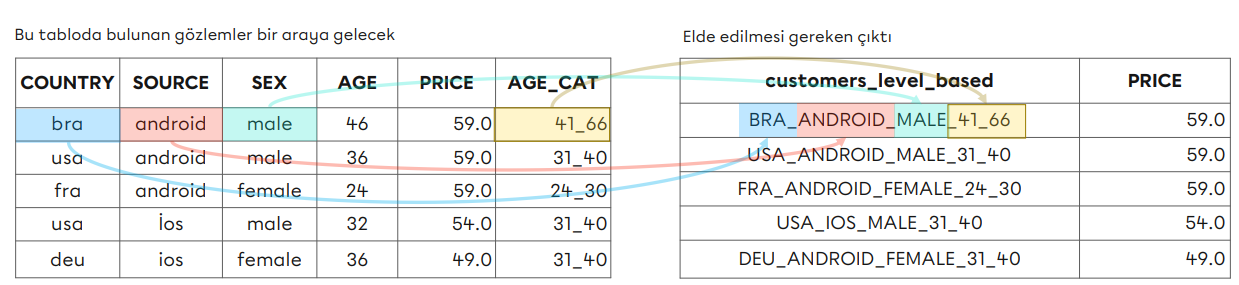

In [105]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   COUNTRY  348 non-null    object  
 1   SOURCE   348 non-null    object  
 2   SEX      348 non-null    object  
 3   AGE      348 non-null    int64   
 4   PRICE    348 non-null    float64 
 5   AGE_CAT  348 non-null    category
dtypes: category(1), float64(1), int64(1), object(3)
memory usage: 14.3+ KB


In [106]:
agg_df["customer_level_based"] = agg_df[["COUNTRY", "SOURCE", "SEX", "AGE_CAT"]].apply("_".join, axis=1)
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT,customer_level_based
0,bra,android,male,46,59.0,41_70,bra_android_male_41_70
1,usa,android,male,36,59.0,31_40,usa_android_male_31_40
2,fra,android,female,24,59.0,24_30,fra_android_female_24_30
3,usa,ios,male,32,54.0,31_40,usa_ios_male_31_40
4,deu,android,female,36,49.0,31_40,deu_android_female_31_40
...,...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,31_40,usa_ios_female_31_40
344,usa,ios,female,30,19.0,24_30,usa_ios_female_24_30
345,can,android,female,27,19.0,24_30,can_android_female_24_30
346,fra,android,male,18,19.0,0_18,fra_android_male_0_18


In [114]:
agg_df.customer_level_based.value_counts() # Her biri unique olmalı

bra_android_male_24_30      7
usa_android_male_41_70      7
usa_ios_female_24_30        7
bra_android_female_24_30    7
usa_android_male_24_30      7
                           ..
tur_android_male_41_70      1
can_android_male_19_23      1
tur_ios_male_31_40          1
tur_ios_male_24_30          1
can_android_female_24_30    1
Name: customer_level_based, Length: 109, dtype: int64

In [115]:
new_persona = agg_df.groupby("customer_level_based").agg({"PRICE":"mean"})
new_persona.

,PRICE
customer_level_based,
bra_android_female_0_18,35.645303
bra_android_female_19_23,34.077340
bra_android_female_24_30,33.863946
bra_android_female_31_40,34.898326
bra_android_female_41_70,36.737179
...,...
usa_ios_male_0_18,33.983495
usa_ios_male_19_23,34.901872
usa_ios_male_24_30,34.838143


In [116]:
new_persona.reset_index(inplace=True)

In [118]:
new_persona.customer_level_based.value_counts() # Her biri unique sınıflar elde ettik.

bra_android_female_0_18    1
tur_android_female_0_18    1
tur_ios_female_19_23       1
tur_ios_female_0_18        1
tur_android_male_41_70     1
                          ..
can_ios_male_41_70         1
can_ios_male_31_40         1
can_ios_male_24_30         1
can_ios_male_0_18          1
usa_ios_male_41_70         1
Name: customer_level_based, Length: 109, dtype: int64

In [124]:
new_persona["customer_level_based"] = new_persona.customer_level_based.apply(lambda x: x.upper())

In [125]:
new_persona.head(10)

,customer_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_70,36.737179
5,BRA_ANDROID_MALE_0_18,34.805861
6,BRA_ANDROID_MALE_19_23,31.673243
7,BRA_ANDROID_MALE_24_30,33.413919
8,BRA_ANDROID_MALE_31_40,34.327381
9,BRA_ANDROID_MALE_41_70,40.041667


# Görev-7

* Yeni müşterileri (personaları) segmentlere ayırınız. 
> * Yeni müşterileri (Örnek: USA_ANDROID_MALE_0_18) PRICE’a göre 4 segmente ayırınız. 
> * Segmentleri SEGMENT isimlendirmesi ile değişken olarak agg_df’e ekleyiniz. 
> * Segmentleri betimleyiniz (Segmentlere göre group by yapıp price mean, max, sum’larını alınız)

In [126]:
new_persona["SEGMENT"] = pd.qcut(new_persona["PRICE"], 4, labels = ["D", "C", "B", "A"])
new_persona

,customer_level_based,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.645303,B
1,BRA_ANDROID_FEMALE_19_23,34.077340,C
2,BRA_ANDROID_FEMALE_24_30,33.863946,C
3,BRA_ANDROID_FEMALE_31_40,34.898326,B
4,BRA_ANDROID_FEMALE_41_70,36.737179,A
...,...,...,...
104,USA_IOS_MALE_0_18,33.983495,C
105,USA_IOS_MALE_19_23,34.901872,B
106,USA_IOS_MALE_24_30,34.838143,B
107,USA_IOS_MALE_31_40,36.206324,A


In [128]:
new_persona.groupby("SEGMENT").agg({"PRICE":["mean", "max", "sum"]})

PRICE                        
              mean        max          sum
SEGMENT                                   
D        29.206780  32.333333   817.789833
C        33.509674  34.077340   904.761209
B        34.999645  36.000000   944.990411
A        38.691234  45.428571  1044.663328

# Görev-8

* Yeni gelen müşterileri sınıflandırıp, ne kadar gelir getirebileceklerini tahmin ediniz. 
> * 33 yaşında ANDROID kullanan bir Türk kadını hangi segmente aittir ve ortalama ne kadar gelir kazandırması beklenir? 
> * 35 yaşında IOS kullanan bir Fransız kadını hangi segmente aittir ve ortalama ne kadar gelir kazandırması beklenir?

In [129]:
# 33 yaş ANDROID Türk Kadın
user1 = "TUR_ANDROID_FEMALE_31_40"

new_persona[new_persona.customer_level_based == user1]

,customer_level_based,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.833333,A


In [131]:
# 35 yaş IOS Fransız Kadın
user2 = "FRA_IOS_FEMALE_31_40"

new_persona[new_persona.customer_level_based == user2]

,customer_level_based,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.818182,C
